In [1]:
!pip install tiingo

In [2]:
from tiingo import TiingoClient
import pandas as pd

# Initialize TiingoClient with your API key
config = {
    'api_key': '88f4bd6b0b4ecae4d2bf1a44b437de363c621d8f',
    'session': True
}

client = TiingoClient(config)
start_date = '1987-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
df=client.get_dataframe('AAPL', frequency='daily',startDate=start_date, endDate=end_date)
print(df.head())

                           close   high    low   open   volume  adjClose  \
date                                                                       
1987-01-02 00:00:00+00:00  40.88  41.13  40.13  40.38   539600  0.140887   
1987-01-05 00:00:00+00:00  43.00  43.25  41.00  41.25  1070000  0.148194   
1987-01-06 00:00:00+00:00  43.75  44.00  42.63  43.13  1450000  0.150778   
1987-01-07 00:00:00+00:00  44.75  44.88  43.63  43.88  1940000  0.154225   
1987-01-08 00:00:00+00:00  44.75  45.13  44.50  44.75  1300000  0.154225   

                            adjHigh    adjLow   adjOpen  adjVolume  divCash  \
date                                                                          
1987-01-02 00:00:00+00:00  0.141749  0.138303  0.139164  120870520      0.0   
1987-01-05 00:00:00+00:00  0.149055  0.141301  0.142163  239680239      0.0   
1987-01-06 00:00:00+00:00  0.151640  0.146919  0.148642  324800324      0.0   
1987-01-07 00:00:00+00:00  0.154673  0.150365  0.151226  434560434      

In [3]:
df.to_csv('AAPL1.csv')


In [4]:
df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
1987-01-02 00:00:00+00:00,40.88,41.13,40.13,40.38,539600,0.140887,0.141749,0.138303,0.139164,120870520,0.0,1.0
1987-01-05 00:00:00+00:00,43.00,43.25,41.00,41.25,1070000,0.148194,0.149055,0.141301,0.142163,239680239,0.0,1.0
1987-01-06 00:00:00+00:00,43.75,44.00,42.63,43.13,1450000,0.150778,0.151640,0.146919,0.148642,324800324,0.0,1.0
1987-01-07 00:00:00+00:00,44.75,44.88,43.63,43.88,1940000,0.154225,0.154673,0.150365,0.151226,434560434,0.0,1.0
1987-01-08 00:00:00+00:00,44.75,45.13,44.50,44.75,1300000,0.154225,0.155534,0.153363,0.154225,291200291,0.0,1.0


In [5]:
df.tail()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2024-12-02 00:00:00+00:00,239.59,240.79,237.16,237.270,48137103,239.59,240.79,237.16,237.270,48137103,0.0,1.0
2024-12-03 00:00:00+00:00,242.65,242.76,238.90,239.810,38861017,242.65,242.76,238.90,239.810,38861017,0.0,1.0
2024-12-04 00:00:00+00:00,243.01,244.11,241.25,242.870,44383935,243.01,244.11,241.25,242.870,44383935,0.0,1.0
2024-12-05 00:00:00+00:00,243.04,244.54,242.13,243.990,40033878,243.04,244.54,242.13,243.990,40033878,0.0,1.0
2024-12-06 00:00:00+00:00,242.84,244.63,242.08,242.905,36870619,242.84,244.63,242.08,242.905,36870619,0.0,1.0


In [6]:
df1=df.reset_index()['close']

In [7]:
df1.shape

(9559,)

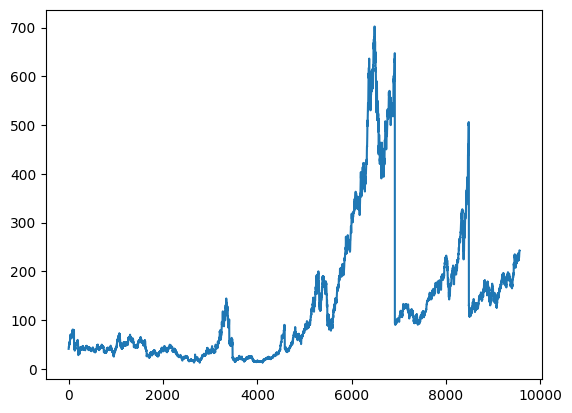

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.04054211]
 [0.04361832]
 [0.0447066 ]
 ...
 [0.3338412 ]
 [0.33388473]
 [0.33359452]]


In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size


(7169, 2390)

In [13]:
print(train_data)
test_data

[[0.04054211]
 [0.04361832]
 [0.0447066 ]
 ...
 [0.16666667]
 [0.16611527]
 [0.16823379]]


array([[0.16781299],
       [0.16575251],
       [0.16538975],
       ...,
       [0.3338412 ],
       [0.33388473],
       [0.33359452]])

In [14]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(7068, 100)
(7068,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(2289, 100)
(2289,)


(None, None)

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
!pip install tensorflow

In [20]:
# ### Create the Stacked LSTM model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM
# model=Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
# model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')

#WITH DROUPOUT LAYERS AND LEARNING RATE
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Dropout
# from tensorflow.keras.optimizers import Adam

# # Define the model
# model = Sequential()

# # First LSTM layer with Dropout
# model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
# model.add(Dropout(0.2))  # Dropout with a rate of 0.2 (20%)

# # Second LSTM layer with Dropout
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))

# # Third LSTM layer with Dropout
# model.add(LSTM(50))
# model.add(Dropout(0.2))

# # Output layer
# model.add(Dense(1))

# # Compile the model with Adam optimizer and custom learning rate
# learning_rate = 0.001  # Set your learning rate here
# optimizer = Adam(learning_rate=learning_rate)
# model.compile(loss='mean_squared_error', optimizer=optimizer)

#----------------------------------------------------------------------------------------#

#WITH BIDIRECTIONAL LSTM
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
# from tensorflow.keras.optimizers import Adam

# # Define the model
# model = Sequential()

# # First Bidirectional LSTM layer with Dropout
# model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(100, 1)))
# model.add(Dropout(0.2))  # Dropout with a rate of 0.2 (20%)

# # Second Bidirectional LSTM layer with Dropout
# model.add(Bidirectional(LSTM(50, return_sequences=True)))
# model.add(Dropout(0.2))

# # Third Bidirectional LSTM layer with Dropout
# model.add(Bidirectional(LSTM(50)))
# model.add(Dropout(0.2))

# # Output layer
# model.add(Dense(1))

# # Compile the model with Adam optimizer and custom learning rate
# learning_rate = 0.001  # Set your learning rate here
# optimizer = Adam(learning_rate=learning_rate)
# model.compile(loss='mean_squared_error', optimizer=optimizer)

#---------------------------------------------------------------------------------------#

##BIDIRECTIONAL WITH MODIFICATION FOR HIGHER BATCH SIZE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(100, 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model with Adam optimizer and custom learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer)









/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 100, 100)            │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100, 100)            │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,701 (553.52 KB)

 Trainable params: 141,701 (553.52 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

##For Bidertional with modification
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Fit the model with early stopping
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=200, batch_size=64, verbose=1, callbacks=[early_stopping])

Epoch 1/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 59s 373ms/step - loss: 0.0097 - val_loss: 6.9769e-04
Epoch 2/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 81s 367ms/step - loss: 8.4909e-04 - val_loss: 6.8985e-04
Epoch 3/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - loss: 0.0011 - val_loss: 7.4075e-04
Epoch 4/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 81s 357ms/step - loss: 0.0010 - val_loss: 5.3534e-04
Epoch 5/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 40s 353ms/step - loss: 9.3432e-04 - val_loss: 4.5576e-04
Epoch 6/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 41s 353ms/step - loss: 6.5383e-04 - val_loss: 5.8846e-04
Epoch 7/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 42s 360ms/step - loss: 9.0365e-04 - val_loss: 4.6932e-04
Epoch 8/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - loss: 0.0011 - val_loss: 4.0776e-04
Epoch 9/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 41s 362ms/step - loss: 8.6002e-04 - val_loss: 4.4428e-04
Epoch 10/200
111/111 ━━━━━━━━━━━━━━━━━━━━ 41s 359ms/step - loss: 6.2988e-04 - val_loss: 7.1854e-04
Epoch 11/200
111/111 ━━━━━━━━━━━━━━

In [23]:
import tensorflow as tf

In [24]:
tf.__version__

'2.17.1'

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

221/221 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step


In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

188.1954471723704

In [28]:
math.sqrt(mean_squared_error(ytest,test_predict))

185.17459783084797

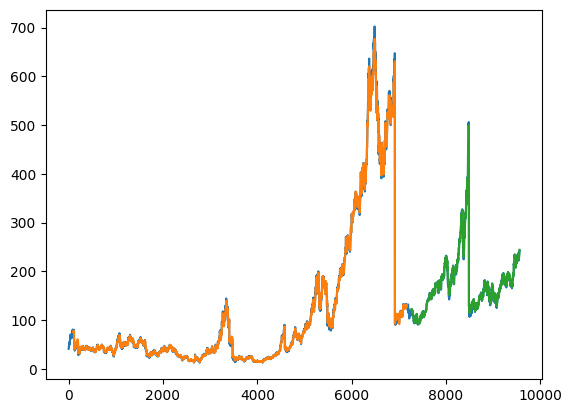

In [76]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [77]:
len(test_data)

2390

In [78]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape


(1, 100)

In [79]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [80]:
temp_input

[0.3065180799814267,
 0.3067067154216728,
 0.3061988507748564,
 0.30772244471530563,
 0.2983342039584422,
 0.29681061001799297,
 0.297492599686575,
 0.29789889140402814,
 0.2987114748389344,
 0.30347089210052824,
 0.29807301642579376,
 0.3002495791978641,
 0.28488304602704745,
 0.2819229206570318,
 0.28568111904347326,
 0.2907452550931569,
 0.29499680770793435,
 0.29686865169191484,
 0.30229554820361026,
 0.30294851703523135,
 0.30730164257937204,
 0.3092315282372744,
 0.30899936154158686,
 0.309899007487376,
 0.3097393928840908,
 0.3070259446282431,
 0.31037785129723144,
 0.3108712055255674,
 0.31210459109640726,
 0.30986998665041504,
 0.31465842474896977,
 0.3135121016890127,
 0.3044721109756806,
 0.3016861106274305,
 0.3039062046549423,
 0.30164257937198913,
 0.30177317313831337,
 0.3006123396598758,
 0.30431249637239544,
 0.3044721109756806,
 0.3040803296767079,
 0.2951128910557781,
 0.2957948807243601,
 0.301453943931743,
 0.31332346624876667,
 0.31235126821057524,
 0.309840965813

Predicted output: [0.33540446]
Day 1 input: [0.30670672 0.30619885 0.30772244 0.2983342  0.29681061 0.2974926
 0.29789889 0.29871147 0.30347089 0.29807302 0.30024958 0.28488305
 0.28192292 0.28568112 0.29074526 0.29499681 0.29686865 0.30229555
 0.30294852 0.30730164 0.30923153 0.30899936 0.30989901 0.30973939
 0.30702594 0.31037785 0.31087121 0.31210459 0.30986999 0.31465842
 0.3135121  0.30447211 0.30168611 0.3039062  0.30164258 0.30177317
 0.30061234 0.3043125  0.30447211 0.30408033 0.29511289 0.29579488
 0.30145394 0.31332347 0.31235127 0.30984097 0.3111469  0.30969586
 0.31136456 0.31175634 0.31931627 0.30946369 0.31029079 0.30868013
 0.31031981 0.30290499 0.30882524 0.31429566 0.31357014 0.31140809
 0.3168495  0.32054965 0.317546   0.31808288 0.32221835 0.32436589
 0.32346625 0.31606594 0.31579024 0.31700911 0.31989669 0.32028847
 0.31510825 0.30902838 0.30467526 0.30336932 0.30545882 0.30439956
 0.31130652 0.31055198 0.30659063 0.30659063 0.30788206 0.31238029
 0.30770793 0.31209

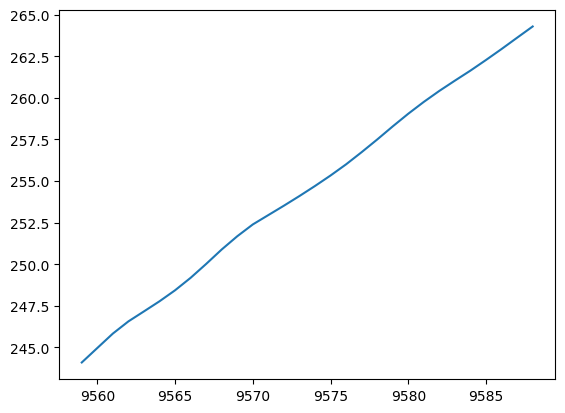

In [81]:
lst_output = []
n_steps = 100
i = 0
while(i < 30):
    if(len(temp_input) > n_steps):
        x_input = np.array(temp_input[-n_steps:])
        print(f"Day {i} input: {x_input}")
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(f"Day {i} output: {yhat}")
        lst_output.append(yhat[0])  # Ensure the predictions are appended
        temp_input.extend(yhat[0].tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        print(f"Predicted output: {yhat[0]}")
        lst_output.append(yhat[0])  # Ensure predictions are appended
        temp_input.extend(yhat[0].tolist())
        i += 1

print(f"lst_output: {lst_output}")  # Check the length and content of lst_output

if len(lst_output) == 0:
    print("No predictions were generated.")
else:
    day_pred = np.arange(len(df1), len(df1) + len(lst_output))

    # Plot predictions
    plt.plot(day_pred, scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)))
    plt.show()


In [82]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [92]:
# Retrieve the first predicted day and value
first_predicted_day = day_pred[0]
first_predicted_value_scaled = lst_output[0]

# Convert the scaled predicted value back to the original scale
first_predicted_value = scaler.inverse_transform(np.array(first_predicted_value_scaled).reshape(-1, 1))

# Print the first predicted date and its corresponding predicted stock price in the original scale
print(f"The first predicted date is Day {first_predicted_day}, and the predicted stock price is: {first_predicted_value[0][0]}")

# -----------------------------------------------------------------------#
#For 10 days prediction

# Loop through the first 10 predicted values (including the first day)
for i in range(10):
    # Retrieve the predicted day and value
    predicted_day = day_pred[i]
    predicted_value_scaled = lst_output[i]

    # Convert the scaled predicted value back to the original scale
    predicted_value = scaler.inverse_transform(np.array(predicted_value_scaled).reshape(-1, 1))

    # Print the predicted date and its corresponding predicted stock price
    print(f"Day {predicted_day-100}, predicted stock price : {predicted_value[0][0]}")


The first predicted date is Day 101, and the predicted stock price is: 244.0873260498047
Day 1, predicted stock price : 244.0873260498047
Day 2, predicted stock price : 244.95774841308594
Day 3, predicted stock price : 245.82540893554688
Day 4, predicted stock price : 246.5582275390625
Day 5, predicted stock price : 247.1592254638672
Day 6, predicted stock price : 247.7661590576172
Day 7, predicted stock price : 248.42735290527344
Day 8, predicted stock price : 249.17617797851562
Day 9, predicted stock price : 250.010986328125
Day 10, predicted stock price : 250.8798828125


In [84]:
import matplotlib.pyplot as plt
len(df1)

9559

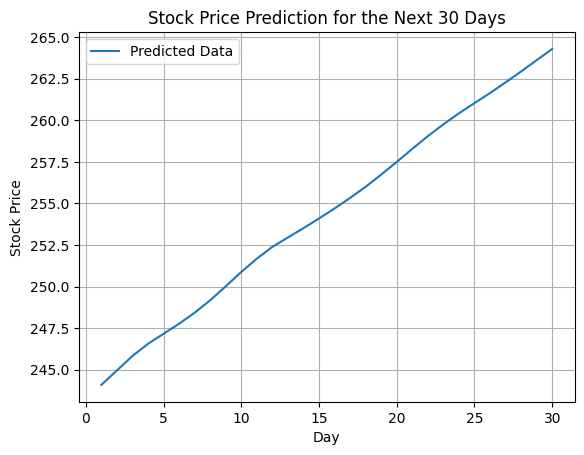

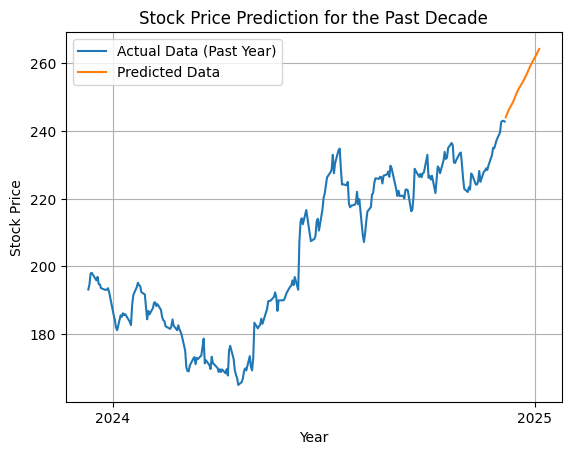

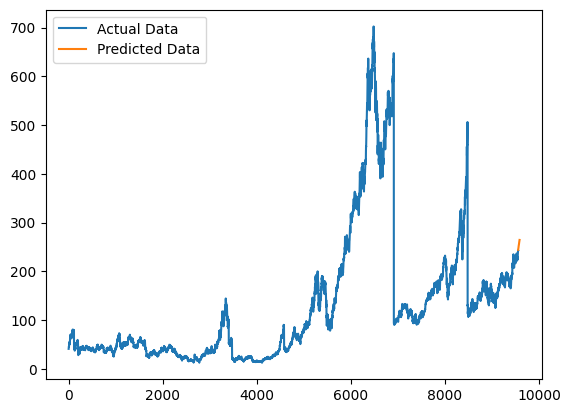

In [96]:
import datetime
import pytz
import matplotlib.dates as mdates

lst_output_flat = np.array(lst_output).flatten()

# -------------------------------------------------------------------------------#
#Graph for next 30 days data

# Flatten the predicted output data
import datetime
import pytz
import matplotlib.pyplot as plt

# Flatten the predicted output data
lst_output_flat = np.array(lst_output).flatten()

# Ensure df.index is timezone-aware
if not df.index.tz:
    df.index = df.index.tz_localize('UTC')  # Localize to UTC if not already
else:
    df.index = df.index.tz_convert('UTC')  # Convert to UTC if already timezone-aware

# Define the number of days for prediction (in this case, 30 days)
days = np.arange(1, 31)  # Days 1 to 30 for the next 30 days

# Plot only predicted data
plt.plot(days, scaler.inverse_transform(lst_output_flat.reshape(-1, 1)), label='Predicted Data')

# Add labels, legend, and title
plt.legend()
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for the Next 30 Days')
plt.grid(True)
plt.show()

#------------------------------------------------------------------------------------#
#Prediction from last year

# Ensure df.index is timezone-aware
if not df.index.tz:
    df.index = df.index.tz_localize('UTC')  # Localize to UTC if not already
else:
    df.index = df.index.tz_convert('UTC')  # Convert to UTC if already timezone-aware

# Define the past decade's datetime
ten_years_ago = datetime.datetime.now(pytz.UTC) - datetime.timedelta(days=365 * 1)

# Filter the DataFrame for data from the past decade
df_past_decade = df[df.index >= ten_years_ago]

# Transform the filtered close prices
df1_past_decade = scaler.transform(df_past_decade['close'].values.reshape(-1, 1))

# Flatten the actual data
df1_past_decade_flat = df1_past_decade.flatten()

# Combine past decade's actual data with predictions
df3_past_decade = np.concatenate([df1_past_decade_flat, lst_output_flat])

# Extract x-axis values for actual and predicted data
actual_x = df_past_decade.index  # Use the actual datetime index for past decade
predicted_x = pd.date_range(start=actual_x[-1], periods=len(lst_output_flat) + 1, freq='D')[1:]  # Generate prediction dates

# Plot actual data
plt.plot(actual_x, scaler.inverse_transform(df1_past_decade_flat.reshape(-1, 1)), label='Actual Data (Past Year)')

# Plot predicted data
plt.plot(predicted_x, scaler.inverse_transform(lst_output_flat.reshape(-1, 1)), label='Predicted Data')

# Format x-axis as years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks as years

# Add labels, legend, and title
plt.legend()
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction for the Past Decade')
plt.grid(True)
plt.show()

# ---------------------------------------------------------------------------------#
#Flatten df1 to a 1D array
df1_flat = df1.flatten()  # Flatten df1 to 1D

# Ensure lst_output is flattened correctly
lst_output_flat = np.array(lst_output).flatten()

# Combine df1_flat and lst_output_flat into a single array
df3 = np.concatenate([df1_flat, lst_output_flat])  # Concatenate the two arrays

# Reshape df3 for inverse_transform (make it 2D)
df3_array = df3.reshape(-1, 1)

# Plot the actual data (last 100 values)
plt.plot(np.arange(len(df1_flat)), scaler.inverse_transform(df1_flat.reshape(-1, 1)), label='Actual Data')

# Plot the predicted data (next 30 values)
plt.plot(np.arange(len(df1_flat), len(df3)), scaler.inverse_transform(df3_array[len(df1_flat):]), label='Predicted Data')

plt.legend()
plt.show()



In [67]:
# Save the model in Keras `.keras` format
model.save("stock_price_prediction_model.keras")



In [68]:
# Save the model in Keras `.keras` format
model.save("stock_price_prediction_model.h5")
